#### 📚 Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 💾 Carga de Data Set

In [2]:
energy_df = pd.read_parquet('../data/interim/energy_modify_dataset.parquet', engine='pyarrow')
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569087 entries, 0 to 569086
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   kWh E     569087 non-null  float64       
 1   Fecha HR  569087 non-null  datetime64[ns]
 2   CLIENTE   569087 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 9.2 MB


### 📊 Descripción de los datos

#### Consumo durante el año 

/tmp/ipykernel_4877/2958752645.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=energy_df, x='Fecha HR', y='kWh E', hue='CLIENTE', ci=None)


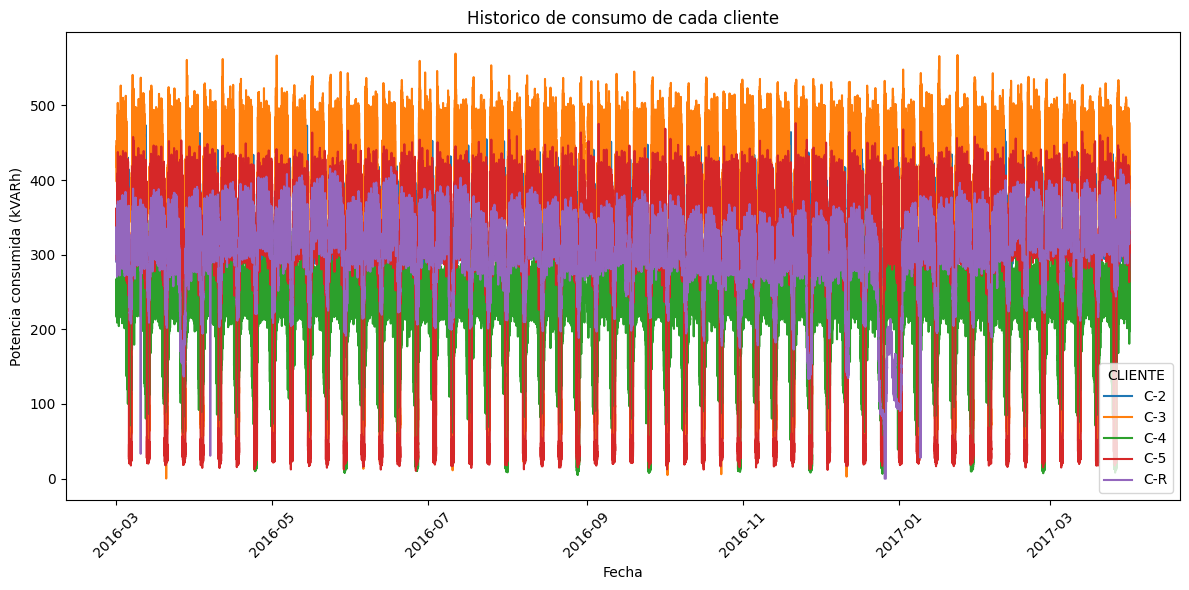

In [3]:
# Gráfico del consumo histórico de energía de cada cliente
plt.figure(figsize=(12, 6))
sns.lineplot(data=energy_df, x='Fecha HR', y='kWh E', hue='CLIENTE', ci=None)
plt.title('Historico de consumo de cada cliente')
plt.xlabel('Fecha')
plt.ylabel('Potencia consumida (kWh E)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

#### Consumo promedio por cada mes 

/tmp/ipykernel_4877/1062631832.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumo_promedio_por_mes = energy_df.groupby(['CLIENTE', 'Mes'])['kWh E'].mean().reset_index()
/tmp/ipykernel_4877/1062631832.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=consumo_promedio_por_mes, x='Mes', y='kWh E', hue='CLIENTE', ci=None)


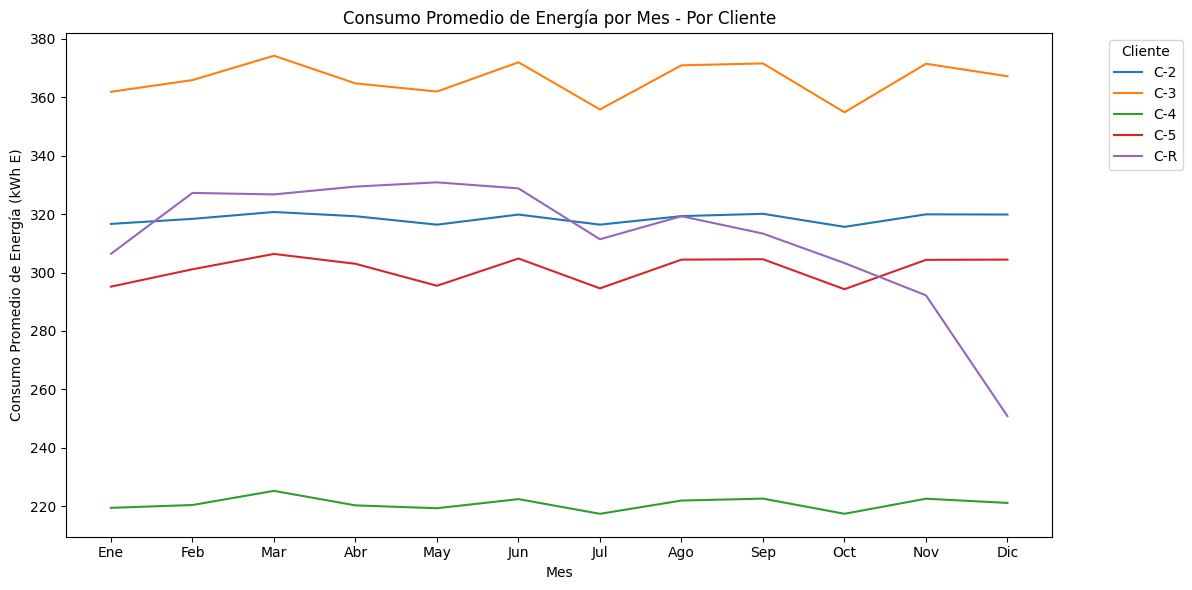

In [5]:
# Convertir la columna 'Fecha HR' a tipo datetime si aún no lo está
energy_df['Fecha HR'] = pd.to_datetime(energy_df['Fecha HR'])

# Agregar una nueva columna 'Mes' que contenga el mes de cada registro
energy_df['Mes'] = energy_df['Fecha HR'].dt.month

# Calcular el consumo promedio por mes de cada usuario
avg_consumption_per_month = energy_df.groupby(['CLIENTE', 'Mes'])['kWh E'].mean().reset_index()
# Graficar el consumo promedio por mes de cada usuario
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_consumption_per_month, x='Mes', y='kWh E', hue='CLIENTE', ci=None)
plt.title('Consumo Promedio de Energía por Mes - Por Cliente')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio de Energía (kWh E)')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Se observa un comportamiento lineal en el consumo de energía para todos los clientes, excepto para el C-R, en el cual se observa una disminución de consumo apartir del mes de septiembre hasta el mes de diciembre

#### Consumo promedio por cada dia de la semana

/tmp/ipykernel_4877/3913148693.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumo_promedio_por_dia_semana = energy_df.groupby(['CLIENTE', 'DiaSemana'])['kWh E'].mean().reset_index()
/tmp/ipykernel_4877/3913148693.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=consumo_promedio_por_dia_semana, x='DiaSemana', y='kWh E', hue='CLIENTE', ci=None, hue_order=energy_df['CLIENTE'].unique(), sort=False)


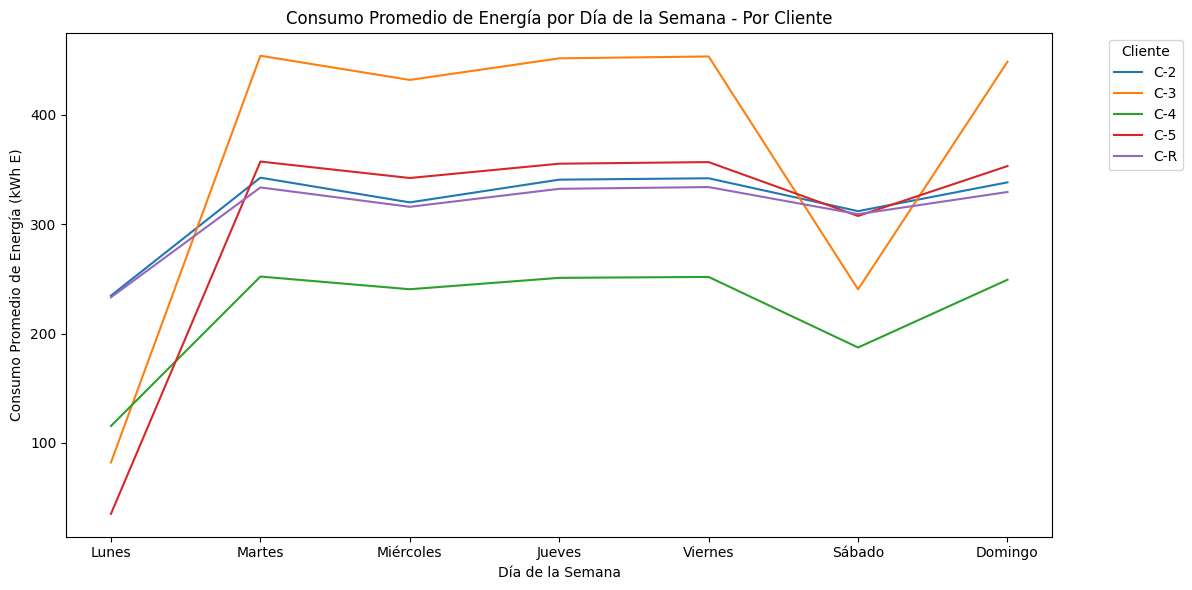

In [6]:
# Agregar una nueva columna 'DiaSemana' que contenga el día de la semana de cada registro (0 para lunes, 1 para martes, ..., 6 para domingo)
energy_df['DiaSemana'] = energy_df['Fecha HR'].dt.dayofweek

# Mapear los números de día de la semana a nombres de día y especificar el orden correcto
week_day_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
energy_df['DiaSemana'] = energy_df['DiaSemana'].map(lambda x: week_day_order[x])

# Calcular el consumo promedio por día de la semana de cada usuario
avg_consumption_per_day_per_week = energy_df.groupby(['CLIENTE', 'DiaSemana'])['kWh E'].mean().reset_index()

# Graficar el consumo promedio por día de la semana de cada usuario
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_consumption_per_day_per_week, x='DiaSemana', y='kWh E', hue='CLIENTE', ci=None, hue_order=energy_df['CLIENTE'].unique(), sort=False)
plt.title('Consumo Promedio de Energía por Día de la Semana - Por Cliente')
plt.xlabel('Día de la Semana')
plt.ylabel('Consumo Promedio de Energía (kWh E)')
plt.xticks(range(len(week_day_order)), week_day_order)  # Establecer las etiquetas del eje x correctamente
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Se observan dias de la semana en los cuales se presenta menor consumo energético (LUNES y SABADO).

/tmp/ipykernel_4877/810334504.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumo_promedio_por_hora_por_cliente = energy_df.groupby(['CLIENTE', 'Hora'])['kWh E'].mean().reset_index()
/tmp/ipykernel_4877/810334504.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=consumo_promedio_por_hora_por_cliente, x='Hora', y='kWh E', hue='CLIENTE', ci=None)


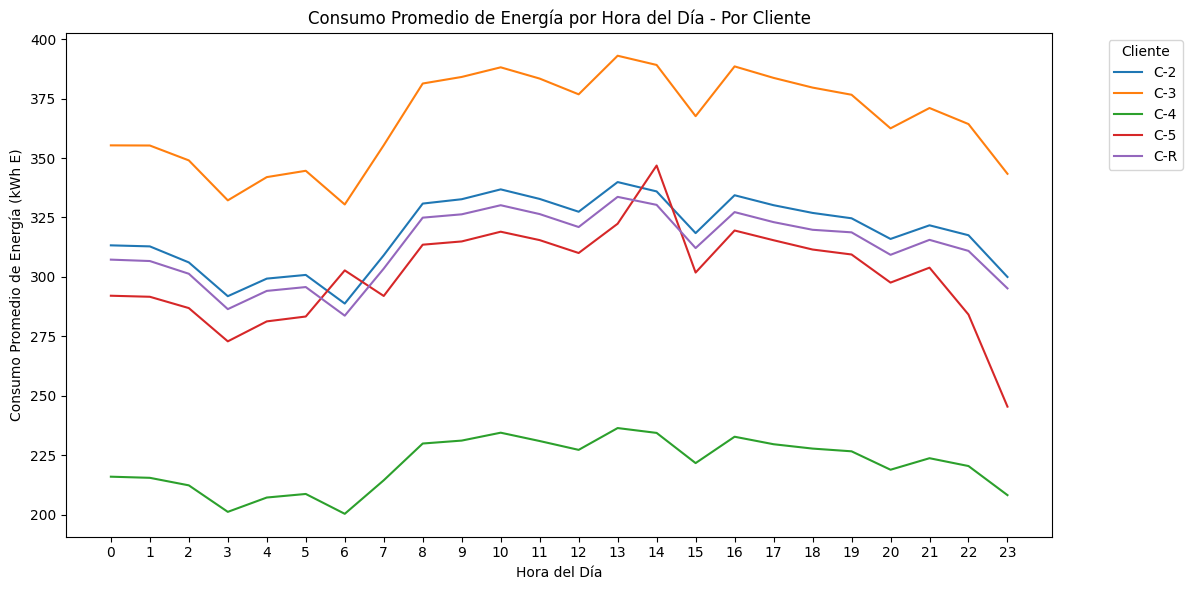

In [8]:
# Extraer la hora de la columna 'Fecha HR'
energy_df['Hora'] = energy_df['Fecha HR'].dt.hour

# Calcular el consumo promedio de energía por hora del día para cada cliente
avg_consumption_per_hour_per_customer = energy_df.groupby(['CLIENTE', 'Hora'])['kWh E'].mean().reset_index()

# Graficar el consumo promedio de energía por hora del día para cada cliente
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_consumption_per_hour_per_customer, x='Hora', y='kWh E', hue='CLIENTE', ci=None)
plt.title('Consumo Promedio de Energía por Hora del Día - Por Cliente')
plt.xlabel('Hora del Día')
plt.ylabel('Consumo Promedio de Energía (kWh E)')
plt.xticks(range(24))
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Se puede observar franja horaria en la que el consumo energético de clientes se aumenta (6 a 20 horas) y se disminuye (20 a 6 horas del próximo día)
